In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import eig
import itertools
import functools
import time
import h5py
from scipy.stats import ortho_group
import matplotlib.pyplot as plt
def norm_complex(arr: np.ndarray):
    if len(arr.shape) > 1:
        ret_out = np.zeros_like(arr)
        for i in range(arr.shape[0]):
            ret_out[i,:] = arr[i]/np.sqrt((np.abs(arr[i])**2).sum())  
        return ret_out
    else:
        return arr/np.sqrt((np.abs(arr)**2).sum())

In [51]:
a = np.array([1, 2, 3]) 
b = np.stack([np.eye(2), np.eye(2),np.eye(2)],axis=0)
print(a.shape, b.shape)
print(np.expand_dims(a, (1, 2))* b)

(3,) (3, 2, 2)
[[[1. 0.]
  [0. 1.]]

 [[2. 0.]
  [0. 2.]]

 [[3. 0.]
  [0. 3.]]]


In [38]:
np.random.seed(0)
at = np.random.randint(low = 0,high=3,size=(3, 3, 2))
np.random.seed(0)
a = np.random.randint(low = 0,high=3,size=(2, 3, 3))
b = np.random.randint(low = 0,high=3,size=(3, 3))
print((a @ b)) #1
print(np.einsum("ijk,kl->ijl", a, b)) #2
print(np.einsum("ijk,jl->ilk", at, b)) #3 -> 3,3,2 x 3,3 -> 3,3,2 -> 2,3,3 

[[[1 0 0]
  [4 5 0]
  [2 0 0]]

 [[2 4 0]
  [5 5 0]
  [2 2 0]]]
[[[1 0 0]
  [4 5 0]
  [2 0 0]]

 [[2 4 0]
  [5 5 0]
  [2 2 0]]]
[[[1 4]
  [2 5]
  [0 0]]

 [[0 4]
  [0 6]
  [0 0]]

 [[4 3]
  [3 4]
  [0 0]]]


In [50]:
def anti_diag(n: int):
    return np.fliplr(np.eye(n))
a = np.stack([np.eye(2) + anti_diag(2), 2*np.eye(2), 3*np.eye(2)], axis=2)#np.array([np.eye(2) + anti_diag(2), 2*np.eye(2), 3*np.eye(2)])
b = 2*np.eye(2) -1*anti_diag(2)
out = np.zeros((2, 2, 3))
out_t = np.zeros((3, 2, 2))
a_T = np.zeros((3, 2, 2))
for i in range(3):
    a_T[i,:,:] = a[:,:,i]
for i in range(3):
    out[:,:,i] = a[:,:,i]@b
    print(a[:,:,i]@b)
# a.shape
es_out = np.einsum('ijk,jk->ijk', a_T, b)
# es_out = np.matmul(a, b, axis=2)
print(out)
print()
print(es_out)
print()
print(np.matmul(a_T, b))

# np.tensordot(a, b[:,np.newaxis], axes=([2],[]))

[[1. 1.]
 [1. 1.]]
[[ 4. -2.]
 [-2.  4.]]
[[ 6. -3.]
 [-3.  6.]]
[[[ 1.  4.  6.]
  [ 1. -2. -3.]]

 [[ 1. -2. -3.]
  [ 1.  4.  6.]]]

[[[ 2. -1.]
  [-1.  2.]]

 [[ 4.  0.]
  [ 0.  4.]]

 [[ 6.  0.]
  [ 0.  6.]]]

[[[ 1.  1.]
  [ 1.  1.]]

 [[ 4. -2.]
  [-2.  4.]]

 [[ 6. -3.]
  [-3.  6.]]]


In [16]:
np.random.seed(0)
n = 3
d = 2**n
n_exp = 2
Y = np.random.randn(n,n)
As = np.random.randn(n,n,n_exp)
out = np.zeros((n,n,n_exp))
for i in range(n_exp):
    out[:,:,i] = As[:,:,i] @ Y
einsum_out = np.einsum("ijk,jk->ijk", As.reshape(As.shape[::-1]), Y).T
print(out)
print(einsum_out)
# print(out)

[[[ 4.09879089  2.38121398]
  [ 2.86182767  1.41174026]
  [-1.03192014 -0.64857947]]

 [[-0.68258525  0.91161892]
  [-0.12034922  1.56895201]
  [ 0.61523515  1.41987448]]

 [[-1.89187111  6.65466304]
  [-0.90435729  4.57788288]
  [ 1.51514076 -1.37684759]]]
[[[ 0.72431725  0.55226781]
  [ 1.70540426  1.46468947]
  [ 0.31702011  2.15646758]]

 [[ 0.05764007 -0.34177257]
  [ 0.22723515  1.61438473]
  [-0.22613964  0.22012873]]

 [[ 1.42335272 -2.49870811]
  [-0.43377772  0.72530146]
  [ 0.0211762  -0.00472314]]]


In [2]:
from ...src.data_generation import generate_data

ImportError: attempted relative import with no known parent package

In [2]:
sx = np.array([[0, 1], [1, 0]])
sy = np.array([[0, 1j], [-1j, 0]])
sz = np.array([[1, 0], [0, -1]])
basis = np.stack([np.eye(2), sx, sy, sz])

n = 4 # Nb of qubits
J = 4**n # Matches the number of bases
I = 6**n # Matches  R*A = 2^n * 3^n = 6^n
d = R = 2**n # matrix dimension and number of possibilities for R^a_s ({-1, 1}^n)
A = 3**n # Number of possible measurements
npa = np.array
b = npa(list(itertools.product(range(4), repeat=n))) # {I, x, y, z}^n
a = npa(list(itertools.product(range(1, 4), repeat=n))) # {x,y,z}^n
# r = npa(list(itertools.product([1, 0], repeat=n))) # {0, 1}^n -> acts like a mask for which bases to select
r = npa(list(itertools.product([-1, 1], repeat=n)))
def projectors(idx_list, r_):
    """
    Returns the P^{a_i}_{s_i} list of projection matrices
    Note1: the evs returned by numpy and the ones obtained don't match, 
    but as they are not unique, it is still correct.
    Note2: because we are working in R^2, we can use the [-1, 1] indexing
    (which works differently in R - it removes the neg col - but still the same here)
    """
    r_idx = [1 if i==-1 else 0 for i in r_]
    evs = [eig(basis[i])[1] for i in idx_list]
    selected_evs = np.array([ev[:, r_idx[i]] for i, ev in enumerate(evs)])
    ret = npa([np.outer(np.conj(ev), ev) for ev in selected_evs])
    # print(ret)
    return ret

# Corresponds to P^a_s in paper (each row here is a matrix), size: 2^n x 3^n flattened
# The projectors matrices 
Pra = []
for j in range(A):
    for i in range(R):
        # print(a[j], r[i])
        # print(projectors(a[j], r[i]))
        # print()
        Pra.append(npa(functools.reduce(np.kron, projectors(a[j], r[i]))).flatten("F"))
Pra = npa(Pra)

In [6]:
np.linalg.eigvals(functools.reduce(np.kron, [sx, sz, sy]))

array([ 1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j,
       -1.+0.j])

In [3]:
# with h5py.File('Pra_py.h5', 'w') as file:
#     file.create_dataset('data', data=Pra.astype(float).T)

In [35]:
def random_complex_ortho(n: int, p: int):
    """Generate a random orthonormal matrix of size n x p
    Args:
        n (int): number of qubits
        p (int): number of columns
    Returns:
        np.ndarray[d, p]
    """
    d = 2**n
    M_re = np.random.multivariate_normal(np.zeros(d), np.eye(d), size=(p))
    M_im = np.random.multivariate_normal(np.zeros(d), np.eye(d), size=(p))
    M = M_re + M_im * 1j
    Q, _ = np.linalg.qr(M.T, mode="reduced")
    return Q
M = random_complex_ortho(3, 2)
M[:, 0] @ np.conj(M[:, 1])

(-1.8041124150158794e-16+1.3877787807814457e-16j)

In [31]:
M

array([[-0.14839731-0.23879089j, -0.21390769-0.20452996j],
       [-0.0980976 +0.11097475j, -0.13282995-0.23708972j],
       [-0.26318619+0.45865823j, -0.28503204-0.00156827j],
       [ 0.32591353-0.05020899j, -0.18747613-0.46236716j],
       [ 0.40741596-0.15881087j, -0.22435618+0.08371165j],
       [-0.11282861-0.46092523j,  0.13120962-0.2769221j ],
       [ 0.00087122-0.16449808j,  0.18127632+0.08779302j],
       [ 0.1794309 +0.18707446j,  0.04127905-0.56112514j]])

In [3]:
#### All possible combinations of a (kron product of all permutations)
# Pauli basis for n qubit 
sig_b = npa([functools.reduce(np.kron, (basis[b[i,:], :, :])) for i in range(J)])


# Only used for the calculation of rho_hat, 
### Maybe matches to p_a,s = P(R^a = s) in paper, size: 6^n x 4^n
# For every comb of the bases (j in 0:J), then for every activation of the bases (r[s in S, ])
# Matrix P_{(r,a),b} 
P_rab = np.zeros((I, J))
for j in range(J):
    tmp = np.zeros((R, A))
    for s in range(R): # r_neg[s] = [-1, 1, -1, 1], b[j]=[1, 2, 0, 2], a[l] = [2, 4, 1, 1] 
        for l in range(A): #  r_neg[s, b[j] != 0] = [-1, 1, 1]
            val = np.prod(r[s, b[j] != 0])\
                * np.prod(a[l, b[j] != 0] == b[j, b[j]!=0]) # a[l, b[j] != 0] == b[j, b[j] != 0] <=> [2, 4, 1] != [1, 2, 2] 
            tmp[s,l] = val
    P_rab[:, j] = tmp.flatten(order="F")

In [5]:
# with h5py.File('P_rab_py.h5', 'w') as file:
#     file.create_dataset('data', data=P_rab.T)

In [6]:
# with h5py.File('sig_b_py.h5', 'w') as file:
#     file.create_dataset('data', data=sig_b.astype(float).reshape(256, 256))

In [18]:
real_world_data = pd.read_table("data/W4-Data.dat", header=None).to_numpy()[:, 1:].flatten()

(1296,)

In [89]:
# Pure state - rank1
# dens_ma = np.zeros((d, d))
# dens_ma[0, 0] = 1

# # Rank2
# v1 = np.zeros(d, dtype="complex")
# v1[0:int(d/2)] = 1
# v1 = norm_complex(v1)
# v2 = np.zeros(d, dtype="complex")
# v2[int(d/2):d] = 1j
# v2 = norm_complex(v2)
# dens_ma = 1/2 * np.outer(v1, np.conj(v1)) + 1/2 * np.outer(v2, np.conj(v2))

# # Approx rank2
# v1 = np.zeros(d, dtype="complex")
# v1[0:int(d/2)] = 1
# v1 = norm_complex(v1)
# v2 = np.zeros(d, dtype="complex")
# v2[int(d/2):d] = 1j
# v2 = norm_complex(v2)
# dens_ma = 1/2 * np.outer(v1, np.conj(v1)) + 1/2 * np.outer(v2, np.conj(v2))
# w = 0.98
# dens_ma = w * dens_ma + (1 - w) * np.eye(d)/d

# Maximal mixed state (rank=16) - ground truth
# u = norm_complex(np.random.multivariate_normal(np.zeros(d*2),np.eye(d*2)/100, size=(d)).view(np.complex128))
# dens_ma = np.conj(u.T) @ u /d

# Corresponds to Tr(rho \dot P^a_s), which in turn corresponds to p_a,s
# These probabilities are the true ones, so we do not have access to them
# We use them below to measure the system
Prob_ar = np.zeros((A, R))
if n==1:
    for i in range(A):
        for j in range(R):
            Prob_ar[i,j] = dens_ma.flatten(order="F") @ projectors(a[i], r[j])
else:
    for i in range(A):
        for j in range(R):
            Prob_ar[i,j] = np.diag(dens_ma @ npa(functools.reduce(np.kron, projectors(a[i], r[j])))).sum()
Prob_ar = np.real(Prob_ar)


# For each observable, we sample according to the true probabilities calculated above
# n_size samples, and then give the probability
# For example: 
# if n=4 (qubits) and a_i = {x, x, y, z}, then an outcome could be s_j {-1, 1, -1, 1}
# For this pair of a,s, we calculate the number of times we sampled this situation (the H == s part) 
#

# Nb of times we repeat the measurements
n_size = 2000
p_ra = np.zeros((R, A)) # = \hat{p}_a,s
for i, x in enumerate(Prob_ar):
    H = np.random.choice(R, n_size, replace=True, p=x) #n_size elements
    out = []
    for s in range(R):
        out.append((H==s).sum()/n_size) # Calculate the empirical prob of this combination
    p_ra[:, i] = out
# Transform matrix to vector form
p_ra1 = p_ra.flatten(order="F")

temp1 = p_ra1 @ P_rab
temp1 = temp1/d

# Calculate coefs rho_b
rho_b = [0] * J
for i in range(J):
    rho_b[i] = temp1[i]/(3**((b[i] == 0).sum()))

# Calculate density using inversion technique
rho_hat = np.zeros((d, d), dtype=np.complex128)
for s in range(J):
    rho_hat += rho_b[s] * sig_b[s]
# rho_hat = rho_hat.astype(float)
u_hat = eig(rho_hat)[1]

# renormalize lambda_hat
lamb_til = eig(rho_hat)[0]
lamb_til[lamb_til < 0] = 0
lamb_hat = lamb_til/lamb_til.sum()

/tmp/ipykernel_18202/1341817435.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
  Prob_ar[i,j] = np.diag(dens_ma @ npa(functools.reduce(np.kron, projectors(a[i], r[j])))).sum()


In [79]:
import time
a = time.perf_counter()
part1 = 0
part2 = 0
part3 = 0
for _ in range(10):
    for i in range(int(2*d)):
        p1s = time.perf_counter()
        p1 = (Pra_m @ tem_can - p_ra1)**2
        p1e = time.perf_counter()
        # part1 += p1e-p1s
        # p2s = time.perf_counter()
        # p2 = np.repeat(p1[:, np.newaxis], p_ra1.shape[0], axis=1)
        # p2e = time.perf_counter()
        # part2 += p2e-p2s
        # p3s = time.perf_counter()
        # p3 = (p2 - p_ra1[:, np.newaxis])**2 
        # p3e = time.perf_counter()
        # part3 += p3e-p3s
        # ss = (np.repeat((Pra_m @ tem_can)[:, np.newaxis], p_ra1.shape[0], axis=1) - p_ra1[:, np.newaxis])**2
b = time.perf_counter()
print(f"Tot: {b-a}; p1: {part1/(b-a)}; p2: {part2/(b-a)}; p3: {part3/(b-a)}")


Tot: 0.12956043099984527; p1: 0.0; p2: 0.0; p3: 0.0


In [10]:
def g():
    import jax
    import jax.random as rd
    import jax.numpy as jnp
    key = jax.random.PRNGKey(0)
    rho = jnp.zeros((d, d))
    key, subkey = rd.split(key)
    Te = rd.exponential(subkey, (d,))# np.random.standard_exponential(d) # Initial Y_i^0
    Id = jnp.eye(d)#np.eye(d)
    U = jnp.asarray(u_hat) # eigenvectors of \hat(rho) found using inversion, initial V_i^0
    Lamb = Te/Te.sum() # gamma^0
    be = 1
    p_ra1 = jnp.asarray(p_ra1)
    Pra_m = jnp.asarray(Pra).reshape((I, J))
    for i in range(10):
        for j in range(d):
            Te_can = Te.copy()
            key, subkey = rd.split(key)
            Te_can.at[j].set(Te[j] * jnp.exp(be * rd.uniform(subkey, (1,), minval=-0.5, maxval=0.5))[0]) # \tilde(Y)_i = exp(y ~ U(-0.5, 0.5)) Y_i^t-1
            L_can = Te_can/Te_can.sum() # \tilde(gamma)_i = \tilde(Y_i)/sum_j^d(\tilde(Y_j))
            tem_can = (U @ jnp.diag(L_can) @ jnp.conj(U.T)).flatten(order="F") # gamma * U * U^T (U = V in paper)
            tem = (U @ jnp.diag(Lamb) @ jnp.conj(U.T)).flatten(order="F")
            ss1 = (jnp.repeat((Pra_m @ tem_can)[:, jnp.newaxis], p_ra1.shape[0], axis=1) - p_ra1[:, jnp.newaxis])**2
            ss2 = (jnp.repeat((Pra_m @ tem)[:, jnp.newaxis], p_ra1.shape[0], axis=1)- p_ra1[:, jnp.newaxis])**2
            ss = (ss1 - ss2).sum()

In [11]:
%lprun -f g g()

UnboundLocalError: local variable 'p_ra1' referenced before assignment

## Main MH

In [90]:
# %load_ext line_profiler

In [91]:
# def f():
# Main part
rho = np.zeros((d, d))
Te = np.random.standard_exponential(d) # Initial Y_i^0
Id = np.eye(d)
U = u_hat # eigenvectors of \hat(rho) found using inversion, initial V_i^0
Lamb = Te/Te.sum() # gamma^0
ro = 1/2
S = (rho_hat + np.conj(rho_hat.T))/2
be = 1

gamm = n_size/2 # lambda in paper 
entry = []
Iter = 500
burnin = 100
start_time = time.time()
Pra_m = npa(Pra).reshape((I, J))
for t in range(Iter + burnin):
    for j in range(d): # Loop for Y_i       
        Te_can = Te.copy() 
        Te_can[j] = Te[j] * np.exp(be * np.random.uniform(-0.5, 0.5, 1)) # \tilde(Y)_i = exp(y ~ U(-0.5, 0.5)) Y_i^t-1
        L_can = Te_can/Te_can.sum() # \tilde(gamma)_i = \tilde(Y_i)/sum_j^d(\tilde(Y_j))
        tem_can = (U @ np.diag(L_can) @ np.conj(U.T)).flatten(order="F") # gamma * U * U^T (U = V in paper)
        tem = (U @ np.diag(Lamb) @ np.conj(U.T)).flatten(order="F") # prev gamma * U * U^T
        #ss = (npa([tem_can.T @ x - p_ra1 for x in Pra])**2 - npa([tem.T @ x - p_ra1 for x in Pra])**2).sum() # l^prob: sum_a sum_s (Tr(v P^a_s) - hat(p^_a,s))^2
        # ss1 = (np.repeat((Pra_m @ tem_can)[:, np.newaxis], p_ra1.shape[0], axis=1) - p_ra1[:, np.newaxis])**2
        # ss2 = (np.repeat((Pra_m @ tem)[:, np.newaxis], p_ra1.shape[0], axis=1)- p_ra1[:, np.newaxis])**2
        ss1 = (Pra_m @ tem_can - p_ra1)**2
        ss2 = (Pra_m @ tem - p_ra1)**2
        ss = (ss1 - ss2).sum()
        r_prior = (ro-1) * np.log(Te_can[j]/Te[j]) - Te_can[j] + Te[j] # other part of R acceptance ratio
        ap = -gamm*np.real(ss) # other part (why use np.real?)
        if np.log(np.random.uniform(0, 1, 1)) <= ap + r_prior: Te = Te_can # if value above draw from U(0,1), then update
        Lamb = Te/Te.sum() # gamma
    for j in range(d): # Loop for V_i
        U_can = U.copy()
        U_can[:, j] = norm_complex(U[:,j] + np.random.multivariate_normal(np.zeros(d*2),np.eye(d*2)/100, size=(1)).view(np.complex128)) # Sample U/V from the unit sphere (not sure why we add to previous value)
        tem_can = (U_can @ np.diag(Lamb) @ np.conj(U_can.T)).flatten(order="F") # gamma * U * U^T
        tem = (U @ np.diag(Lamb) @ np.conj(U.T)).flatten(order="F") # gamma * U_t-1 * U^T_t-1
        # ss = (npa([tem_can.T @  x - p_ra1 for x in Pra])**2 - npa([tem.T @ x - p_ra1 for x in Pra])**2).sum() # l^prob: sum_a sum_s (Tr(v P^a_s) - hat(p^_a,s))^2
        # ss1 = (np.repeat((Pra_m @ tem_can)[:, np.newaxis], p_ra1.shape[0], axis=1) - p_ra1[:, np.newaxis])**2
        # ss2 = (np.repeat((Pra_m @ tem)[:, np.newaxis], p_ra1.shape[0], axis=1)- p_ra1[:, np.newaxis])**2
        ss1 = (Pra_m @ tem_can - p_ra1)**2
        ss2 = (Pra_m @ tem - p_ra1)**2
        ss = (ss1 - ss2).sum()
        ap = -gamm * np.real(ss) # other part of A accep ratio
        if np.log(np.random.uniform(0, 1, 1)) <= ap: U = U_can # if value above draw from U(0,1), then update

    if t > burnin:
        rho = U @ np.diag(Lamb) @ np.conj(U.T)/(t - burnin) + rho*(1-1/(t-burnin)) # approximate rho each time as rho_t = gamma_t * V_t * V_t^T /(t-burnin) + rho_t-1 / (1 - 1/(t-burnin)) -> the later we are, the more importance we give to prev rho
end_time = time.time()

In [83]:
#%lprun -f f f()

In [95]:
from scipy.special import gamma
gamma(1/2)

1.7724538509055159

In [93]:
print(f"Took: {end_time - start_time} s")
mean_rho = np.real(np.mean((dens_ma - rho) @ np.conj((dens_ma - rho).T)))
mean_rho_hat = np.real(np.mean((dens_ma - rho_hat) @ np.conj((dens_ma - rho_hat).T)))
rho_evs = eig(rho)[0]

Took: 9.70662546157837 s


In [94]:
print(f"MSE MH: {mean_rho:.2e} - MSE inversion: {mean_rho_hat:.2e}")

MSE MH: 2.18e-05 - MSE inversion: 2.42e-05


In [84]:
rho_hat.min(), rho_hat.max(), rho_hat.mean()

((-0.008895833333333339-0.0032916666666666693j),
 (1+0j),
 (0.0040953414351851845+4.0657581468206416e-20j))

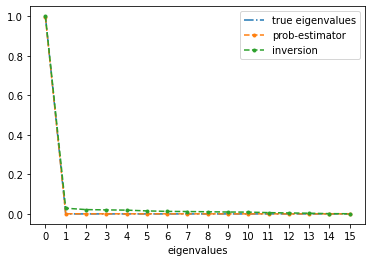

In [88]:
evs_true = sorted(np.abs(eig(dens_ma)[0]), reverse=True)
evs_MH = sorted(np.abs(eig(rho)[0]), reverse=True)
evs_inv = sorted(np.abs(eig(rho_hat)[0]), reverse=True)
x = range(len(evs_true))
plt.plot(x, evs_true, "-.", label="true eigenvalues")
plt.plot(x, evs_MH, "--.", label="prob-estimator")
plt.plot(x, evs_inv, "--.", label="inversion")
plt.legend()
plt.xticks(x)
plt.xlabel("eigenvalues")
plt.show()

In [79]:
sorted(eig(dens_ma)[0], reverse=True)

[(0.4912499999999999+0j),
 (0.4912499999999999+0j),
 (0.0012500000000000107+0j),
 (0.0012500000000000102+0j),
 (0.0012500000000000013+0j),
 (0.001250000000000001+0j),
 (0.001250000000000001+0j),
 (0.001250000000000001+0j),
 (0.0012500000000000007+0j),
 (0.0012500000000000007+0j),
 (0.0012500000000000007+0j),
 (0.0012500000000000007+0j),
 (0.0012500000000000007+0j),
 (0.0012500000000000002+0j),
 (0.0012499999999999998+0j),
 (0.0012499999999999963+0j)]

In [34]:
0.9998 * 1/2

0.4999

In [65]:
vec_to_add = 30
rd_vec = np.random.multivariate_normal(np.zeros(2), np.eye(2), vec_to_add)
out_mat = np.zeros((2, 2))
for i in rd_vec:
    norm_i = norm_complex(i)
    out_mat += np.outer(norm_i, norm_i)
np.linalg.matrix_rank(out_mat)

2

In [63]:
np.linalg.matrix_rank(out_mat)

2